In [2]:
import pandas as pd
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()
import random
random.seed(42)

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df2=df1.drop(['area_type','availability','society','balcony'],axis='columns')

In [5]:
df2.isnull().sum()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df3=df2.dropna()
df3.isnull().sum()
df3.shape

(13246, 5)

In [7]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df3['bhk']=df3['size'].apply(lambda x:int(x.split(" ")[0]))

C:\Users\somul\AppData\Local\Temp\ipykernel_16876\2507312172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int(x.split(" ")[0]))


In [9]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [10]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
def convert(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [14]:
df4=df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert)
df3['location']=df3['location'].apply(lambda x:x.lower())
df4.loc[30]
df4.shape

C:\Users\somul\AppData\Local\Temp\ipykernel_16876\1267230773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['location']=df3['location'].apply(lambda x:x.lower())


(13246, 6)

In [15]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [16]:
len(df5['location'].unique())

1304

In [17]:
df5.location=df5.location.apply(lambda x:x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [18]:
len(location_stats[location_stats<=10])

1052

In [19]:
len(df5['location'].unique())

1293

In [20]:
location_stats_less_than_10=location_stats[location_stats<=10]
len(location_stats_less_than_10)

1052

In [21]:
df5.location=df5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [22]:
df5['location']=df5['location'].apply(lambda x:x.title())
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase Ii,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [23]:
df5.shape

(13246, 7)

In [24]:
df6=df5[~((df5.total_sqft/df5.bhk) <300)]
df6.shape

(12502, 7)

In [26]:
import numpy as np
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

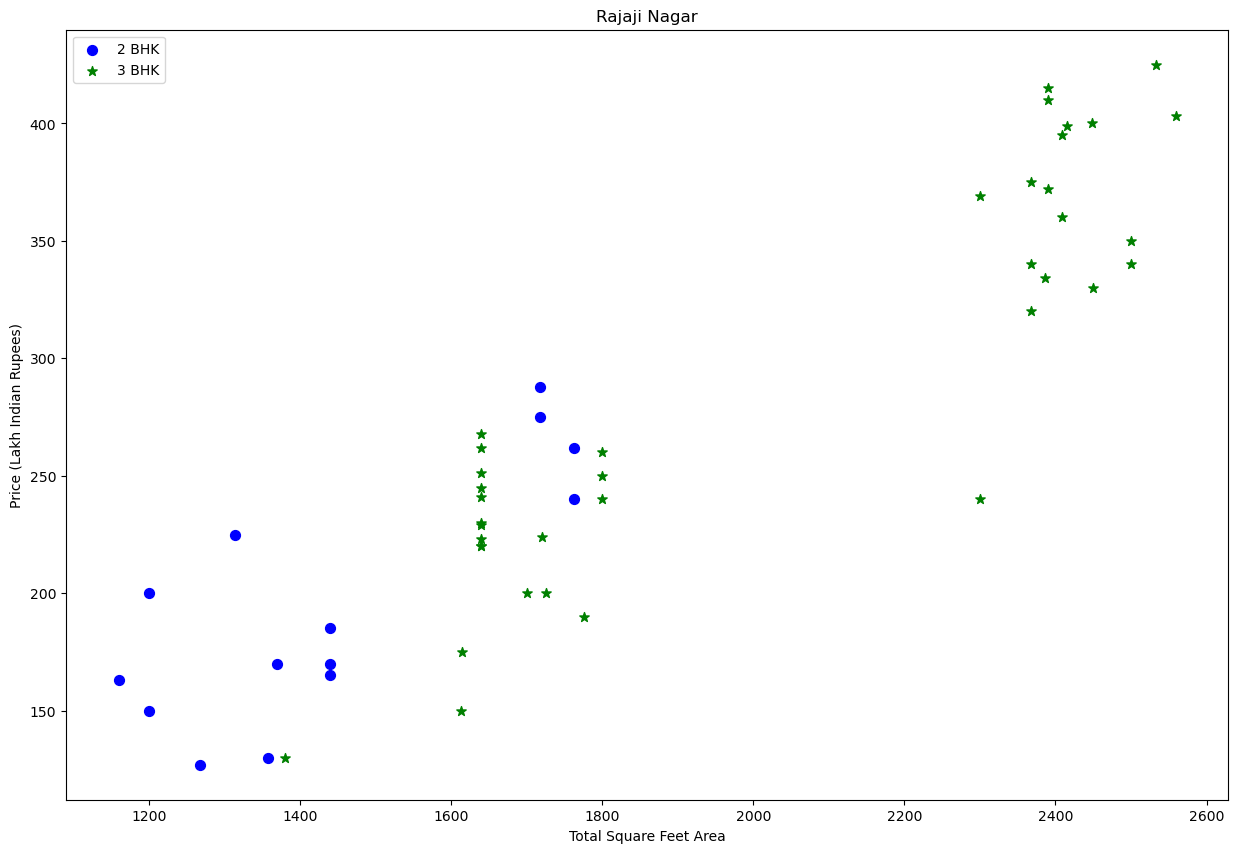

In [27]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='*', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [44]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8= remove_bhk_outliers(df7)
# df8 = df7.copy()
print(df7.shape)
df8.shape

(10241, 7)


(7329, 7)

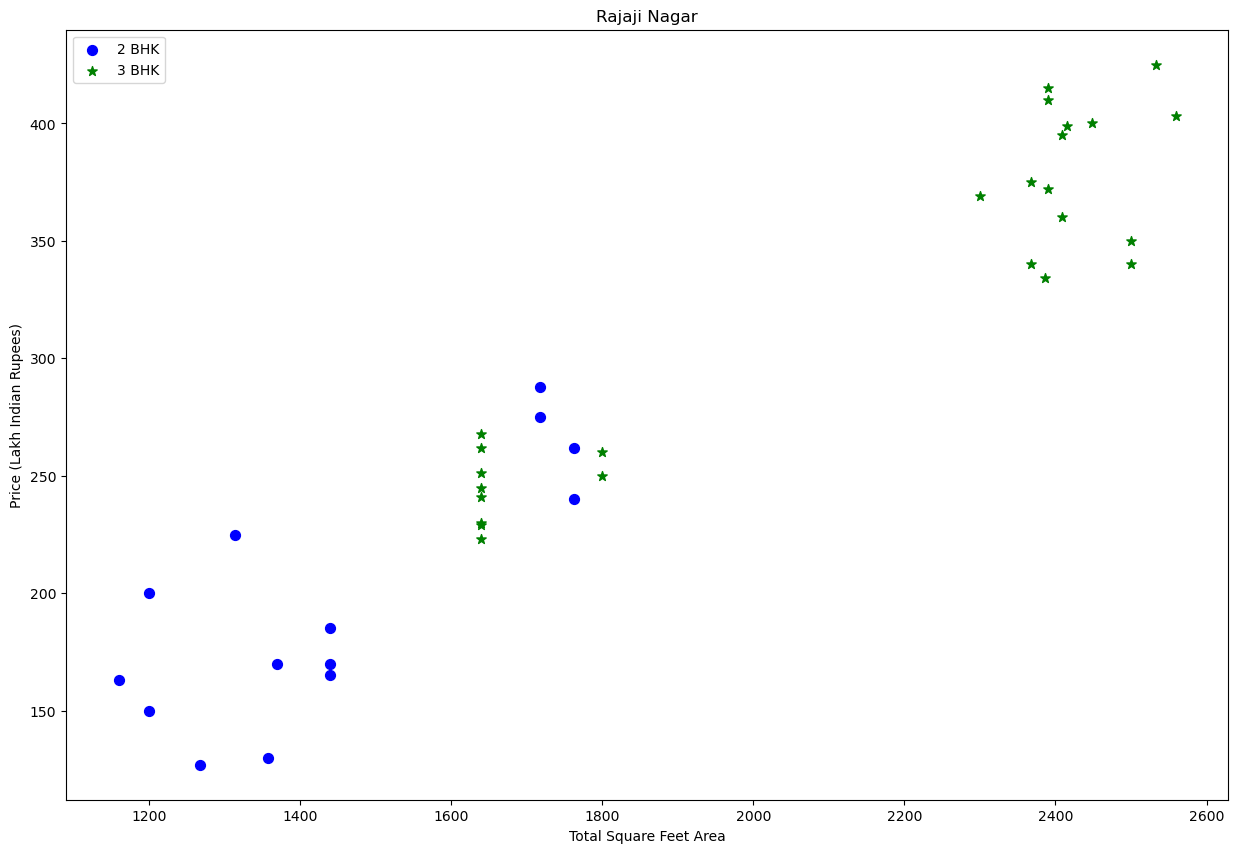

In [60]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='*', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df8,"Rajaji Nagar")

In [45]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [46]:
df9=df9.drop(['size','price_per_sqft'],axis='columns')

In [47]:
len(df9['location'].unique())
df9.head(10)

,location,total_sqft,bath,price,bhk
0,1St Block Jayanagar,2850.0,4.0,428.0,4
1,1St Block Jayanagar,1630.0,3.0,194.0,3
2,1St Block Jayanagar,1875.0,2.0,235.0,3
3,1St Block Jayanagar,1200.0,2.0,130.0,3
4,1St Block Jayanagar,1235.0,2.0,148.0,2
5,1St Block Jayanagar,2750.0,4.0,413.0,4
6,1St Block Jayanagar,2450.0,4.0,368.0,4
8,1St Phase Jp Nagar,1875.0,3.0,167.0,3
9,1St Phase Jp Nagar,1500.0,5.0,85.0,5
10,1St Phase Jp Nagar,2065.0,4.0,210.0,3


In [48]:
df10=df9.copy()
dummies=pd.get_dummies(df10.location)
df10.head(10)

,location,total_sqft,bath,price,bhk
0,1St Block Jayanagar,2850.0,4.0,428.0,4
1,1St Block Jayanagar,1630.0,3.0,194.0,3
2,1St Block Jayanagar,1875.0,2.0,235.0,3
3,1St Block Jayanagar,1200.0,2.0,130.0,3
4,1St Block Jayanagar,1235.0,2.0,148.0,2
5,1St Block Jayanagar,2750.0,4.0,413.0,4
6,1St Block Jayanagar,2450.0,4.0,368.0,4
8,1St Phase Jp Nagar,1875.0,3.0,167.0,3
9,1St Phase Jp Nagar,1500.0,5.0,85.0,5
10,1St Phase Jp Nagar,2065.0,4.0,210.0,3


In [49]:
df11=pd.concat([df10,dummies.drop('Other',axis='columns')],axis='columns')

In [50]:
df12=df11.drop(['location'],axis='columns')
df12.head(5)

,total_sqft,bath,price,bhk,1St Block Jayanagar,1St Phase Jp Nagar,2Nd Phase Judicial Layout,2Nd Stage Nagarbhavi,5Th Block Hbr Layout,5Th Phase Jp Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df12.shape

(7251, 245)

In [52]:
x=df12.drop(['price'],axis='columns')
x.head(10)

,total_sqft,bath,bhk,1St Block Jayanagar,1St Phase Jp Nagar,2Nd Phase Judicial Layout,2Nd Stage Nagarbhavi,5Th Block Hbr Layout,5Th Phase Jp Nagar,6Th Phase Jp Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1875.0,3.0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1500.0,5.0,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2065.0,4.0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y=df12.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10230    100.0
10231    108.0
10233    185.0
10238    135.0
10239    160.0
Name: price, Length: 7251, dtype: float64

In [54]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [55]:
x_train,x_test,y_trian,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [56]:
model=LinearRegression()
model.fit(x_train,y_trian)
model.score(x_test,y_test)

0.8638676148136639

In [57]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(model,x,y,cv=cv)

array([0.86386761, 0.8458667 , 0.86255481, 0.85848431, 0.86491898])

In [58]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                #'normalize': [True, False]
                'fit_intercept':[True,False],
                'positive': [True,False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)


C:\Users\somul\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\somul\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\somul\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\somul\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\somul\anaconda3\lib\site-packages\sklearn\base.py", line 

,model,best_score,best_params
0,linear_regression,0.859665,"{'fit_intercept': False, 'positive': False}"
1,lasso,0.719415,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.693203,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [71]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1St Block Jayanagar',
       '1St Phase Jp Nagar', '2Nd Phase Judicial Layout',
       '2Nd Stage Nagarbhavi', '5Th Block Hbr Layout', '5Th Phase Jp Nagar',
       '6Th Phase Jp Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [82]:

index=np.where(x.columns=='1St Block Jayanagar')[0][0]
print(index)


3


0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10230    100.0
10231    108.0
10233    185.0
10238    135.0
10239    160.0
Name: price, Length: 7251, dtype: float64

In [81]:
def predict_price(location,area,bath,bhk):
    index=np.where(x.columns==location)[0][0]
    l=np.zeros(len(x.columns))
    l[0]=area
    l[1]=bath
    l[2]=bhk
    if index>=0:
        l[index]=1
    return model.predict([l])[0]
predict_price('1St Phase Jp Nagar',1800,3,3)

C:\Users\somul\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


156.04987685416188

In [84]:
predict_price('Vishveshwarya Layout',1800,5,6)

C:\Users\somul\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


67.2338708659744